<a href="https://colab.research.google.com/github/wwefddd/Numerical-Analysis/blob/main/Diffusion(Heat)_Equ_12_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Forward Euler Method

Maximum error= 0.7934927788711511


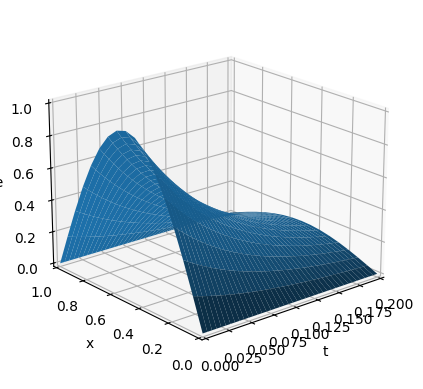

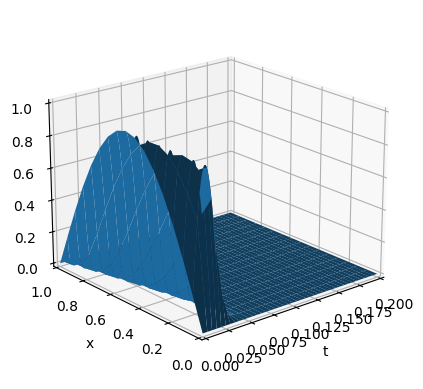

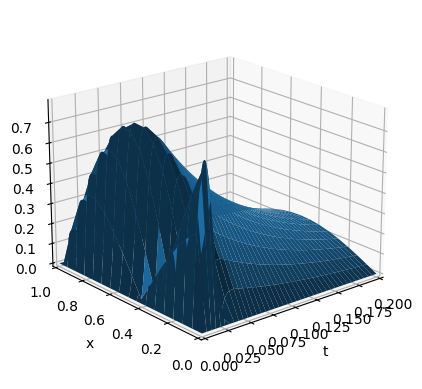

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# time domain
dt = 1/1000
M = 201
T = dt * (M-1)
t = np.linspace(0, T, M) # discrete time

# x domain
a, b = 0, 1
N = 16 + 1  # number of intervals + 1 point
h = (b - a) / (N - 1)
x = np.linspace(a ,b, N)
u = np.zeros((M, N))

u[0, :] = np.sin(np.pi * x)

for k in range(0, M-1):
  for i in range(1, N-1):
    u[k+1, i] = u[k, i] + dt/h**2 * ( u[k, i+1] - 2*u[k,i] + u[k,i+1])

tgrid, xgrid = np.meshgrid(t, x)
tgrid = np.transpose(tgrid) # t는 y축에 맞게 매칭 (원래는 x축에 맞게 매칭되었음)
xgrid = np.transpose(xgrid) # x는 x축에 맞게 매칭 (원래는 y축에 맞게 매칭되었음)
u_e = np.exp(-np.pi**2 * tgrid) * np.sin(np.pi * xgrid) # Exact solution
error = np.abs(u - u_e)
max_error = np.max(error)
print('Maximum error=', max_error)

plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(tgrid, xgrid, u_e)
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u_e')
ax.set_xlim(0, T)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.view_init(azim =-130, elev=20)

plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(tgrid, xgrid, u)
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')
ax.set_xlim(0, T)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.view_init(azim =-130, elev=20)

plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(tgrid, xgrid, np.abs(u - u_e))
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('error')
ax.set_xlim(0, T)
ax.set_ylim(0, 1)
ax.view_init(azim =-130, elev=20)
plt.show()

Backward Euler Method

[[0.00000000e+00 1.95090322e-01 3.82683432e-01 ... 3.82683432e-01
  1.95090322e-01 1.22464680e-16]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
Maximum error= 0.0029844835337540787


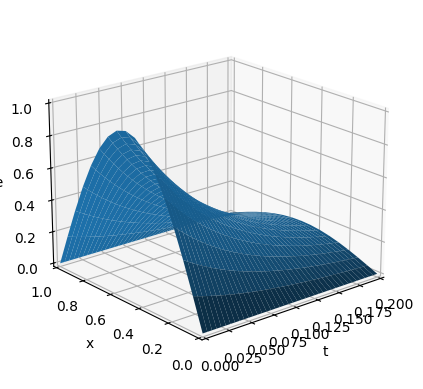

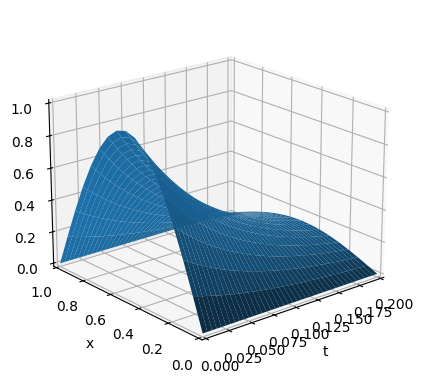

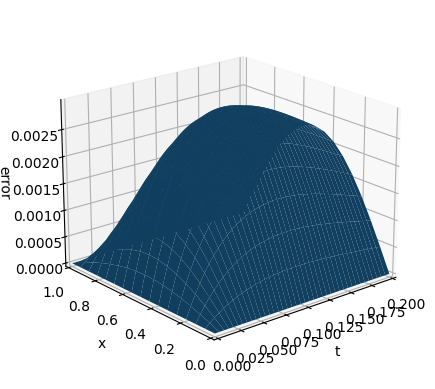

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Boundary condition BC u(t,0) = ut0, u(t,1) = ut1
ut0 = 0
ut1 = 0

# time domain
dt = 1/1000
M = 201
T = dt * (M-1)
t = np.linspace(0, T, M) # discrete time

# x domain
a, b = 0, 1 # domain
N = 16 + 1  # number of intervals + 1 point
h = (b - a) / (N - 1)
x = np.linspace(a ,b, N)
u = np.zeros((M, N))

# Construct the discrete matrix 'L'
L = np.zeros( (N-2, N-2))
L[0,0] = 1 + 2 * dt / (h**2)
L[0, 1] = -dt / (h**2)
L[N-3, N-4] = -dt / (h**2)
L[N-3, N-3] = 1 + 2 * dt / (h**2)
for i in range(1, N-3) :
  L[i, i-1:i+2] = [-dt/(h**2), 1 + 2 * dt / (h**2), -dt/(h**2)]

#Initial condition
u[0, :] = np.sin(np.pi * x) # for IC

print(u)
# Compute U
for k in range(0, M-1):
    u[k, 0] = u[k, 0] + dt/h**2 * ut0 # for BC
    u[k, N-1] = u[k, N-1] + dt/h**2 * ut1 # for BC
    u[k+1, 1:N-1] = np.matmul( np.linalg.inv(L), u[k, 1:N-1])

tgrid, xgrid = np.meshgrid(t, x)
tgrid = np.transpose(tgrid) # t는 y축에 맞게 매칭 (원래는 x축에 맞게 매칭되었음)
xgrid = np.transpose(xgrid) # x는 x축에 맞게 매칭 (원래는 y축에 맞게 매칭되었음)
u_e = np.exp(-np.pi**2 * tgrid) * np.sin(np.pi * xgrid) # Exact solution
error = np.abs(u - u_e)
max_error = np.max(error) # 이 결과가 diverging 하는지 판단할 수 있다.
print('Maximum error=', max_error)

plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(tgrid, xgrid, u_e)
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u_e')
ax.set_xlim(0, T)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.view_init(azim =-130, elev=20) # 3d 결과를 보는 각도 설정

plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(tgrid, xgrid, u)
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')
ax.set_xlim(0, T)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.view_init(azim =-130, elev=20)

plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(tgrid, xgrid, np.abs(u - u_e))
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('error')
ax.set_xlim(0, T)
ax.set_ylim(0, 1)
ax.view_init(azim =-130, elev=20)
plt.show()